## 1. Добро пожаловать!

Привет!

И добро пожаловать на чемпионат по прогнозированию временных рядов среди выпускников Практикума. Меня зовут Дима и я тоже недавно закончил курс Практикума по DA.

Ежегодно Call Center Guru проводит мероприятие, где собираются профессионалы индустрии, обсуждаются лучшие практики, технологии и проводятся соревнования и мастер-классы. Одно из соревнований для специалистов по управлению ситуацией в контакт-центр (WFM) было связано с прогнозированием.

В задачи этого чемпионата входило спрогнозировать 2 временных ряда: количество поступивших звонков и среднюю продолжительность разговора, время которое оператор КЦ разговаривает с клиентом (AHT/Average Handling Time).

На выполнения задания отводилось 6 часов, в течение которых необходимо было отправить ответ организатору чемпионата. На деле, выполнение этого задания укладывается в 1-2 часа. По итогам чемпионата подводятся итоги среднее арифметическое по показателю WAPE трёх прогнозируемых величин — чем меньше, тем лучше. Описано в разделе "Подведение итогов."

Призовые места распределились так:
1. Альфа-Банк
2. Астра Пейдж
3. Neovox (я был здесь)

Если есть вопросы по данным чемпионата или нашёл ошибку [отправь мне сообщение 📟](t.me/liveworkdie). Буду надеятся, что в данных ошибок обнаружить не удастся, потому что данные выложил AS IS 😁

## 2. Информация для выполнения заданий

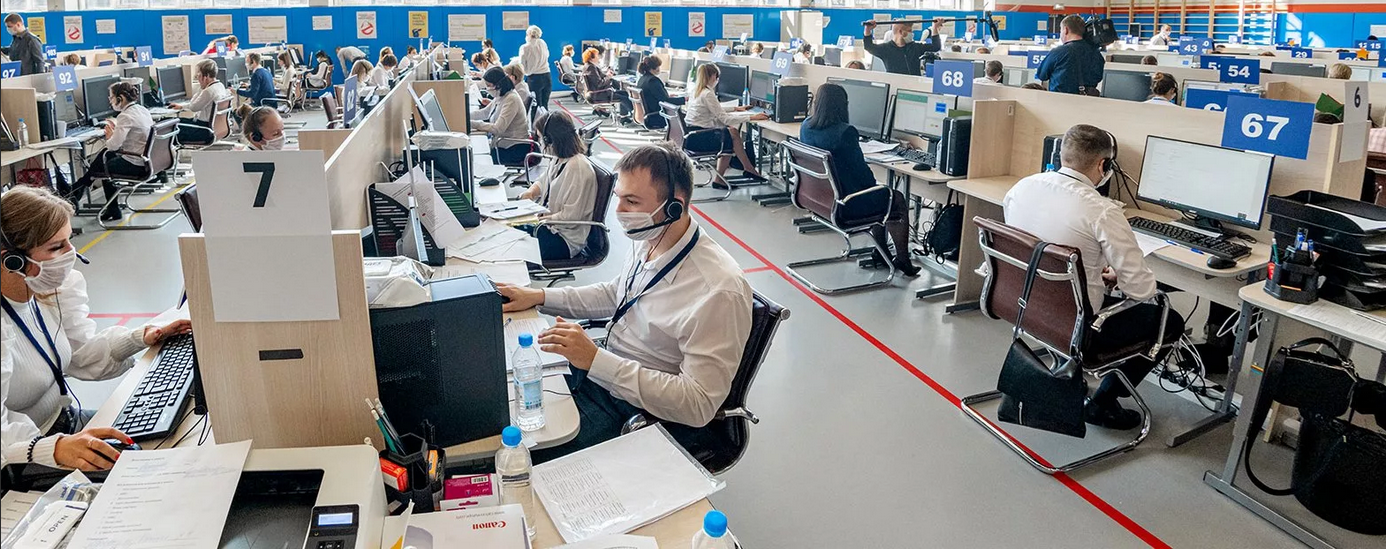

### Данные
Данные — [ссылка на Яндекс.Диск](https://disk.yandex.ru/d/MxnFbQl0QqxzZw)

1. **Файл `data.csv`** Интервальные исторические данные за три года – с 01.10.2017 по 30.08.2020 года.
    - datetime — дата и время
    - calls — количество звонков, которое поступило
    - aht — среднее время разговора с клиентом
    
2. **Файл `events.csv`** Информация о событиях (день события и параметры события, если применимо), в результате которых нагрузка отклонялась от типичной за период исторических данных и информация о будущих событиях, в результате которой нагрузка будет отклоняться от типичной.
    - date — дата, когда произошло или произойдёт события
    - events — с каким событием связана эта дата
    - type — тип события 
    - reach — охват события в клиентах

**Что известно о компании:**
- Компания оказывает услуги контакт-центра и обслуживает звонки по телефону.
- Компания периодически проводит маркетинговые акции двух типов – РЕКЛАМА и РАССЫЛКА. Предполагается, что эти события влияют на нагрузку только в день их проведения. 
- Разные типы маркетинговых акций по-разному оказывают влияние на нагрузку.
- Влияние РЕКЛАМЫ и РАССЫЛКИ зависит от величины охвата аудитории. Информация об охвате аудитории  приведена в соответствующих файлах 

**Поправка на COVID-19**

- Известно, что в период с 30.03.2020 по 30.04.2020 наблюдалось влияние от введения локдауна в связи с COVID-19 на количество звонков (`calls`).
- Значение `aht` за этот период существенно не изменилось.
- Паттерны распределения нагрузки внутри месяца, недели и дня также не изменились.

**Внедрение виртуального ассистента**

- Известно, что с 01.12.2020 компания вводит в действие виртуального голосового ассистента.
- Ассистент будет работать в период с 15:00 до 19:59:59 ежедневно.
- Ассистент был всесторонне протестирован и установлено, что во время его работы количество обращений (`calls`) к операторам снижается примерно на 11%.
- Значение `aht` существенно не изменяется

### Задача

Необходимо подготовить прогноз `calls` и `aht` на каждый интервал 15 минут на период с 01.09.2020 по 28.02.2021 года.

### Подведение итогов
1. Будет проведена оценка WAPE **по дням по точности прогнозирования calls** за период с 01.09.2020 по 28.02.2021. Показатель `WAPE_VOL_DAY`.
1. Будет проведена оценка WAPE **по интервалам по точности прогнозирования calls** за период с 01.12.2020 по 28.02.2021. Показатель `WAPE_VOL_I`.
1. Будет проведена оценка WAPE **по интервалам по точности прогнозирования aht** за период с 01.12.2020 по 28.02.2021. Показатель `WAPE_AHT_I`.
1. Победитель будет определён на основе среднего этих 3 оценок:\
Показатель `WAPE_av` = (WAPE_VOL_DAY + WAPE_VOL_I + WAPE_AHT_I) / 3


Участник с наименьшим значением `WAPE_av` будет объявлен победителем.

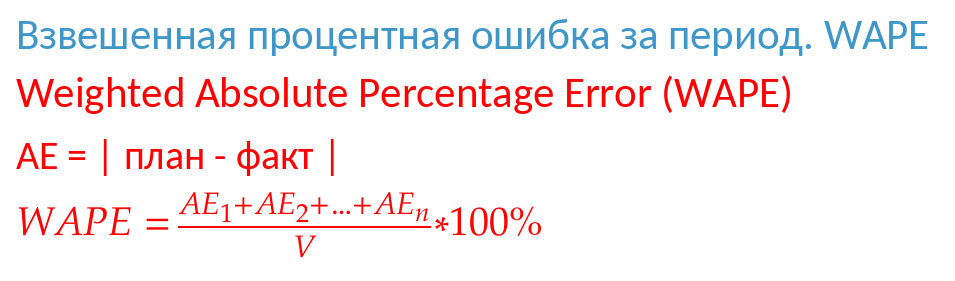

Внимание! Результат необходимо округлять до целых значений и при использовании sklearn выставить `random_state=0`.

### Тайминги
- Ты отправляешь код своего решения в виде ipynb файла в пятницу через форму 12.08.2022 до 23:59 (UTC +3)
- Я подвожу итоги в группе Data Alumni Chat в субботу 13.08.2022 с турнирной таблицей всех участников + результаты участников прошлых лет.

---

**Good luck & have fun!**

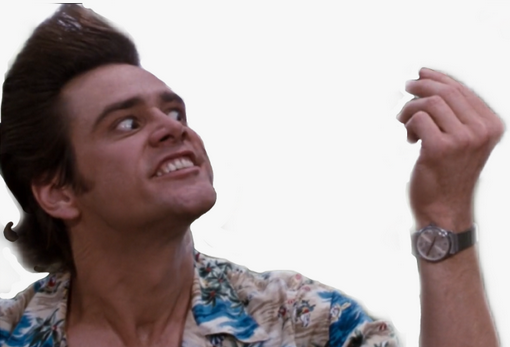

Представься, пожалуйста.

Можешь указать свой логин телеграм, имя/фамилию или придумать никнейм в стиле "Дисептикон Петрович". Оно будет записано в турнирную таблицу для предоставления результатов всех участников.

In [1]:
# укажи как тебя представить в турниной таблице
participant_name = 'Pavel Dobrynin'

## 3. Выполнение задания

### 3.1 Предобработка и анализ данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from datetime import date, timedelta, datetime

-  Данные 'data.csv'

In [3]:
data = pd.read_csv('data.csv', index_col = [0], parse_dates = [0])

In [4]:
data

,calls,aht
datetime,,
2017-10-01 00:00:00,25,325
2017-10-01 00:14:59,16,367
2017-10-01 00:30:00,20,335
2017-10-01 00:45:00,22,315
2017-10-01 00:59:59,12,309
...,...,...
2020-08-31 22:44:59,129,343
2020-08-31 23:00:00,104,332
2020-08-31 23:15:00,94,319


Проверим, что даты идут по возрастанию и они уникальны:

In [5]:
data.index.is_monotonic

False

In [6]:
data.index.is_unique

True

Отсортируем по возрастанию даты:

In [7]:
data = data.sort_index()

In [8]:
data.index.is_monotonic

True

Проверим, какие уникальные часовые индексы существуют:

In [9]:
pd.Series(data.index).dt.time.unique()

array([datetime.time(0, 0), datetime.time(0, 14, 59),
       datetime.time(0, 30), datetime.time(0, 45),
       datetime.time(0, 59, 59), datetime.time(1, 15),
       datetime.time(1, 30), datetime.time(1, 44, 59),
       datetime.time(2, 0), datetime.time(2, 15),
       datetime.time(2, 29, 59), datetime.time(2, 45),
       datetime.time(3, 0), datetime.time(3, 14, 59),
       datetime.time(3, 30), datetime.time(3, 45),
       datetime.time(3, 59, 59), datetime.time(4, 15),
       datetime.time(4, 30), datetime.time(4, 44, 59),
       datetime.time(5, 0), datetime.time(5, 15),
       datetime.time(5, 29, 59), datetime.time(5, 45),
       datetime.time(6, 0), datetime.time(6, 14, 59),
       datetime.time(6, 30), datetime.time(6, 45),
       datetime.time(6, 59, 59), datetime.time(7, 15),
       datetime.time(7, 30), datetime.time(7, 44, 59),
       datetime.time(8, 0), datetime.time(8, 15),
       datetime.time(8, 29, 59), datetime.time(8, 45),
       datetime.time(9, 0), datetime.tim

In [10]:
len(pd.Series(data.index).dt.time.unique())

96

Всего 96 уникальных значений времени, здесь всё корректно.

Посмотрим на данные по звонкам и времени разговора:

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102336 entries, 2017-10-01 00:00:00 to 2020-08-31 23:45:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   calls   102336 non-null  int64
 1   aht     102336 non-null  int64
dtypes: int64(2)
memory usage: 2.3 MB


In [12]:
data.describe()

,calls,aht
count,102336.000000,102336.000000
mean,117.849134,303.954620
std,128.160982,50.218954
min,0.000000,0.000000
25%,14.000000,287.000000
50%,76.000000,309.000000
75%,199.000000,334.000000
max,2963.000000,377.000000


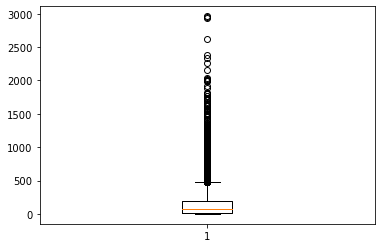

In [13]:
plt.boxplot(data['calls'])
plt.show()

Потенциальные выбросы по кол.-ву звонков сверху будут начинаться от 1.5*IQR+Q3, т.е. от ~476.5. Посмотрим, сколько всего таких значений:

In [14]:
data['calls'][data['calls']>476.5].count()

1328

Таких значений 1328 или 1.3% от общего кол.-ва. Постараемся не исключать их из данных, а посмотреть на их возможную причину.

Рассмотрим данные по времени разговора:

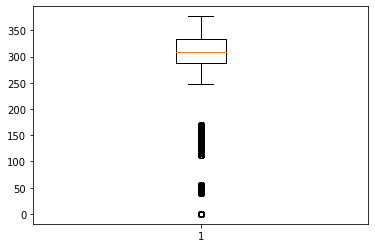

In [15]:
plt.boxplot(data['aht'])
plt.show()

Выбросы сверху отсутствуют.

Создадим функцию для отрисовки графика:

In [16]:
def my_plot_std(data, x_lbl='x axis', y_lbl='y axis', title='title', x_size=15, y_size=5):
    """
    Функция для отрисовки графика
    """
    df = data.copy()
    ax = df.plot(figsize=(x_size, y_size))
    ax.set_xlabel(x_lbl)
    ax.set_ylabel(y_lbl)
    ax.set_title(title)
    plt.show()

Построим графики по звонкам и времени разговора за весь имеющийся период.

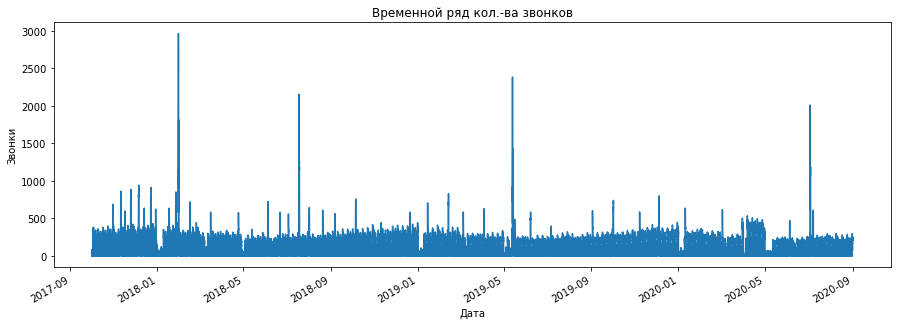

In [17]:
my_plot_std(data['calls'], x_lbl='Дата', y_lbl='Звонки', title='Временной ряд кол.-ва звонков')

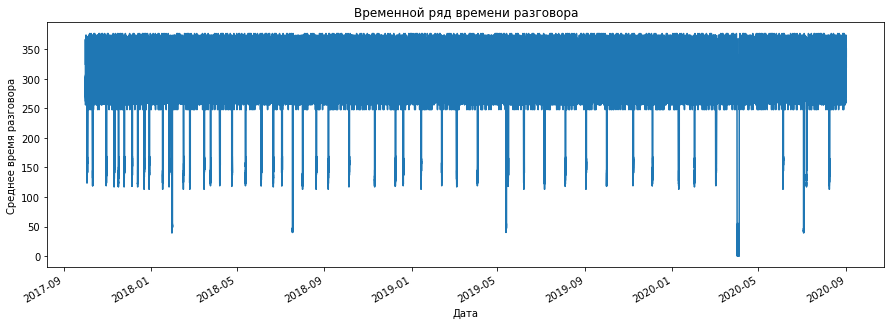

In [18]:
my_plot_std(data['aht'], x_lbl='Дата', y_lbl='Среднее время разговора', title='Временной ряд времени разговора')

Создадим функцию для построения более детального графика:

In [19]:
def my_plot(data, resamp_int, roll, start, end):
    """
    Функция отрисовки графиков calls, aht.
    data - входные данные; 
    resamp_int - интервал ресемплирования;
    roll - окно для скользящего среднего;
    start - начала периода;
    end - конец периода.    
    """
    df = data.copy()
    df = df.resample(resamp_int).sum()

    df['rolling_mean_calls'] = df['calls'].rolling(roll).mean()
    df['rolling_mean_aht'] = df['aht'].rolling(roll).mean()
    ax = df[start:end][['calls', 'rolling_mean_calls']].plot(figsize=(15,5))
    bx = df[start:end][['aht', 'rolling_mean_aht']].plot(figsize=(15,5))
    plt.show()

Возьмём период за август-сентябрь 2018 и построим более детальный график:

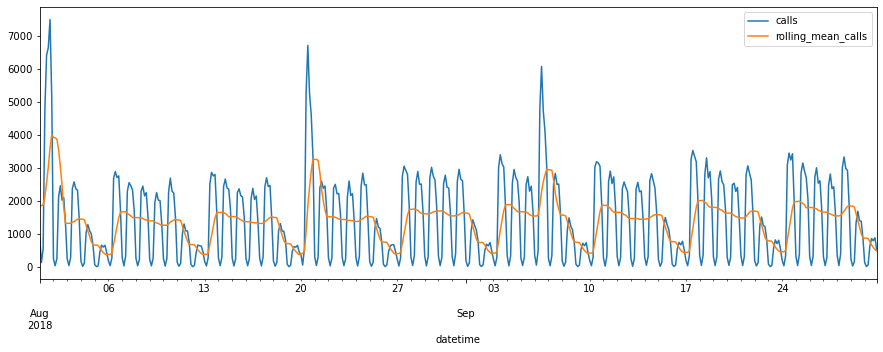

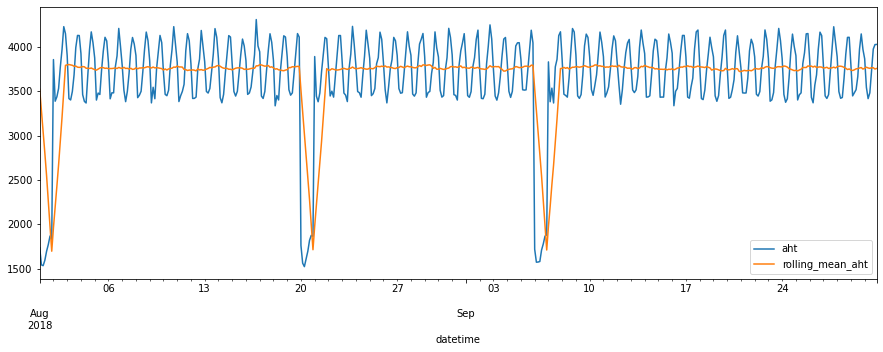

In [20]:
my_plot(data, '3H', 8, '2018-08-01', '2018-09-30')

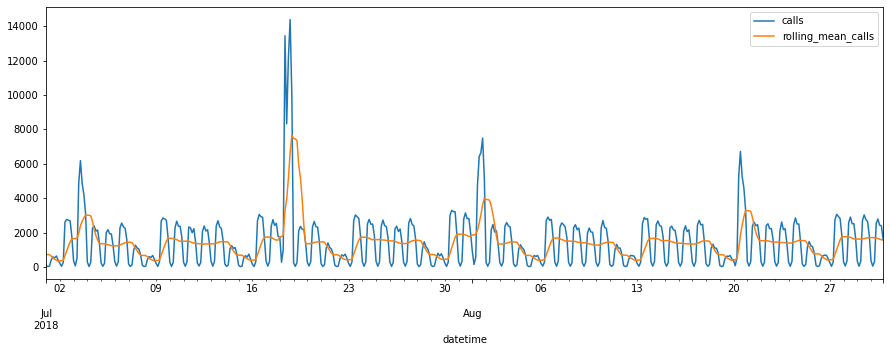

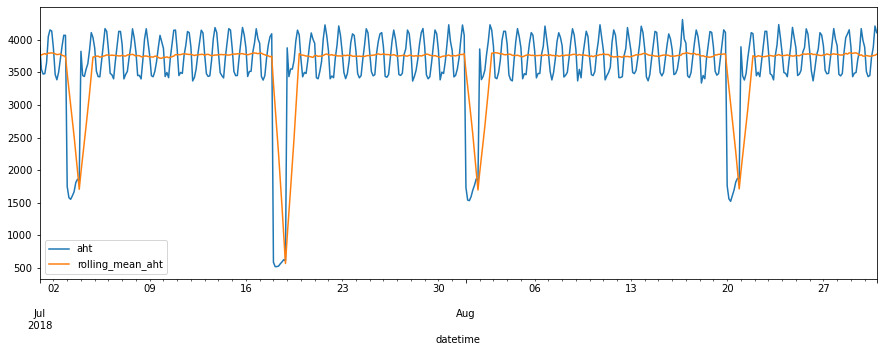

In [21]:
my_plot(data, '3H', 8, '2018-07-01', '2018-08-30')

По графику видно, что кол.-во звонков наибольшее в понедельник, далее плавно уменьшается к пятнице, в субботу и воскресенье падает в несколько раз ниже. В некоторые дни происходят события, которые увеличивают кол.-во звонков в несколько раз по сравнению с обычными будними днями. Продолжительность разговора при наступлении событий падает, в остальные же моменты зависит от времени суток.

Посмотрим на графики за неделю с одной рассылкой в понедельник, 20 августа:

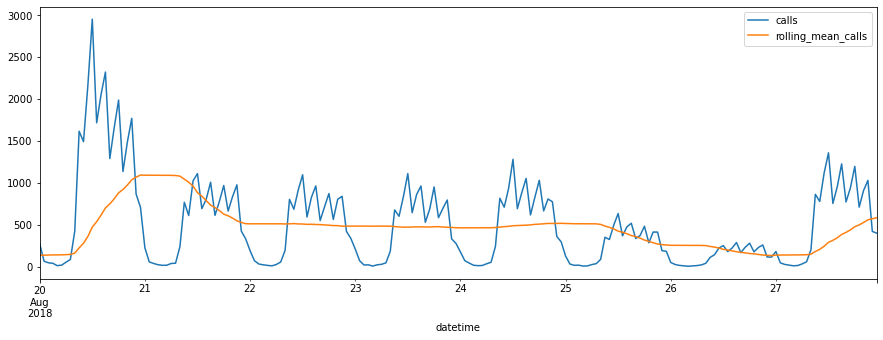

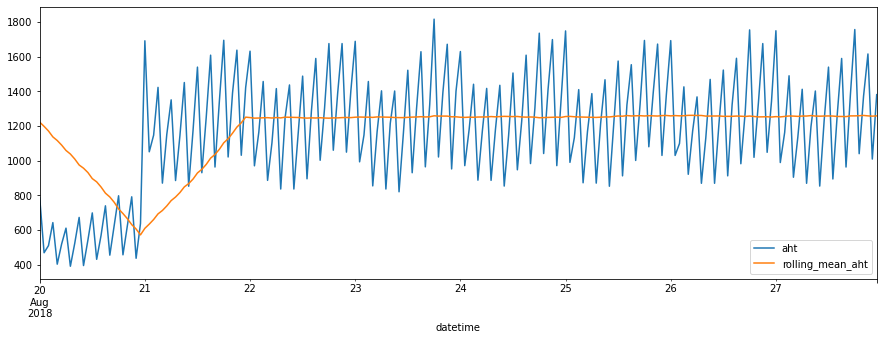

In [22]:
my_plot(data, '1H', 24, '2018-08-20', '2018-08-27')

Построим суточный график за четверг, 23 августа 2018:

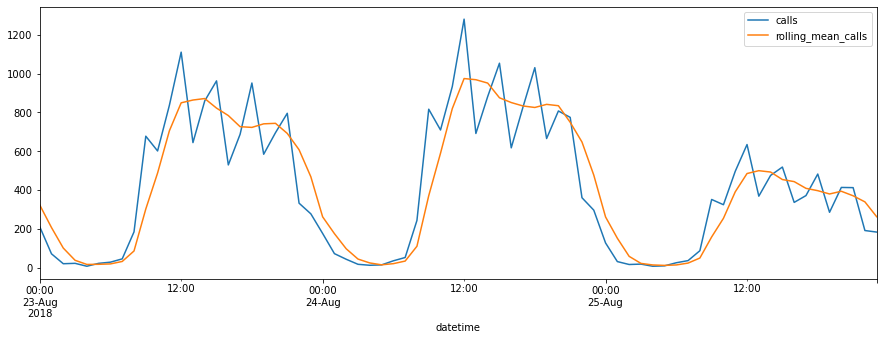

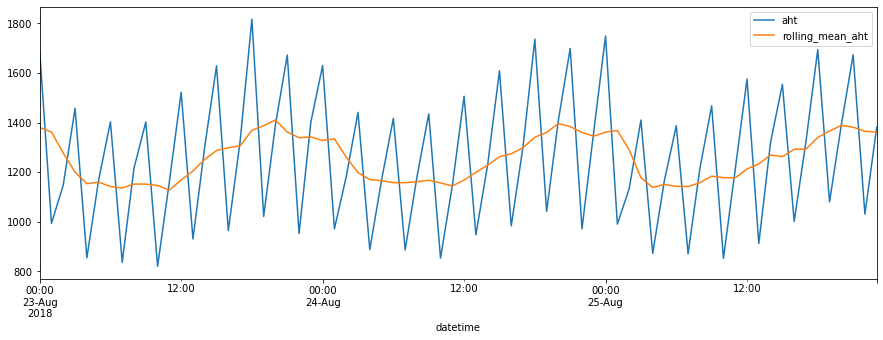

In [23]:
my_plot(data, '1H', 3, '2018-08-23', '2018-08-25')

Суточные колебания наиболее выражены в кол.-ве звонков, время разговора меняется более плавно.

- Посмотрим на декомпозицию временного ряда кол.-ва звонков:

In [24]:
decomposed_calls = seasonal_decompose(data.drop(columns='aht'), period=96)

Тренд:

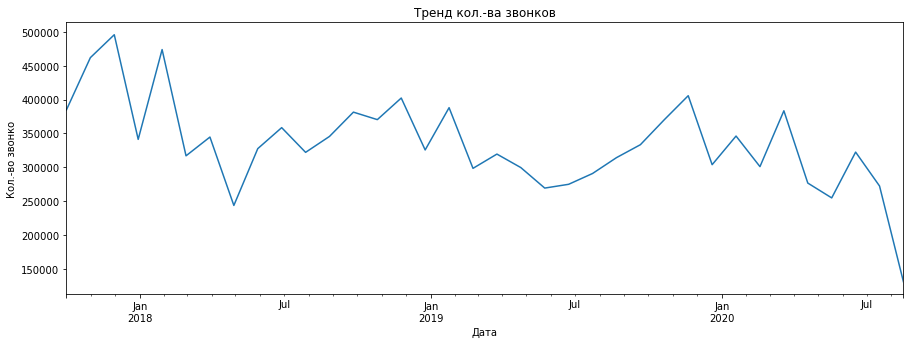

In [25]:
my_plot_std(decomposed_calls.trend.resample('30D').sum(),
           x_lbl='Дата', y_lbl='Кол.-во звонко', title='Тренд кол.-ва звонков')

Тренд можно скорее назвать стабильным, не растущим и не падающим.

Сезонная составляющая:

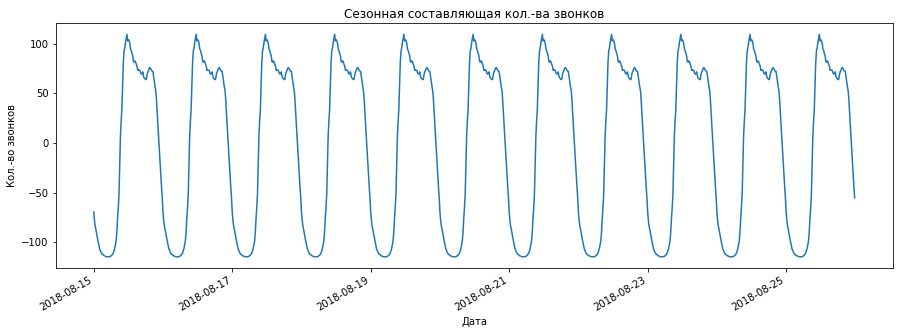

In [26]:
my_plot_std(decomposed_calls.seasonal['2018-08-15':'2018-08-25'],
           x_lbl='Дата', y_lbl='Кол.-во звонков', title='Сезонная составляющая кол.-ва звонков')

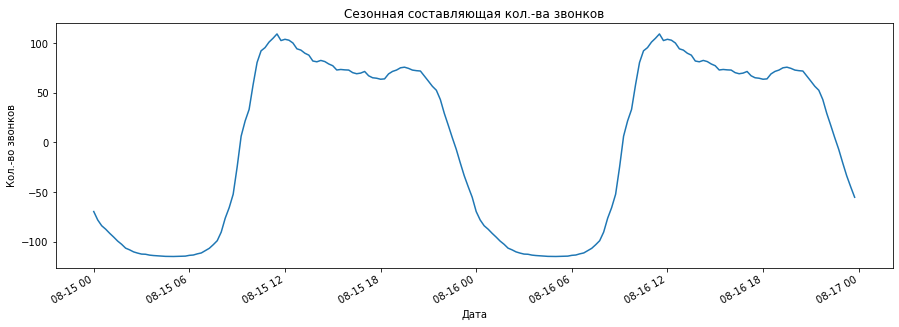

In [27]:
my_plot_std(decomposed_calls.seasonal['2018-08-15':'2018-08-16'],
           x_lbl='Дата', y_lbl='Кол.-во звонков', title='Сезонная составляющая кол.-ва звонков')

Наиболее выраженна внутрисуточная сезонность.

Остатки временного ряда:

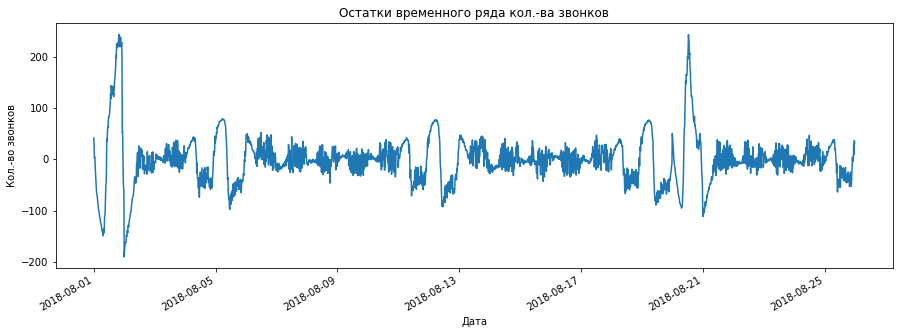

In [28]:
my_plot_std(decomposed_calls.resid['2018-08-01':'2018-08-25'],
           x_lbl='Дата', y_lbl='Кол.-во звонков', title='Остатки временного ряда кол.-ва звонков')

Посмотрим на декомпозицию времени звонков aht:

In [29]:
decomposed_aht = seasonal_decompose(data.drop(columns='calls'), period = 96) 

Тренд:

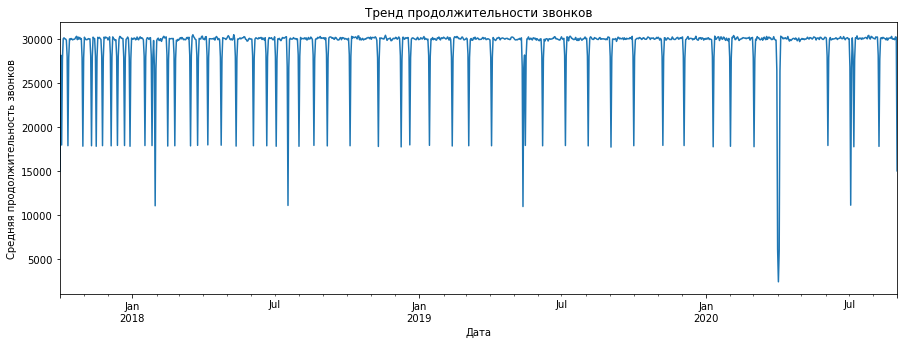

In [30]:
my_plot_std(decomposed_aht.trend.resample('1D').sum(),
           x_lbl='Дата', y_lbl='Средняя продолжительность звонков', title='Тренд продолжительности звонков')

Показатели продолжительности звонков стабильны и падают только во время каких-либо событий.

Сезонность:

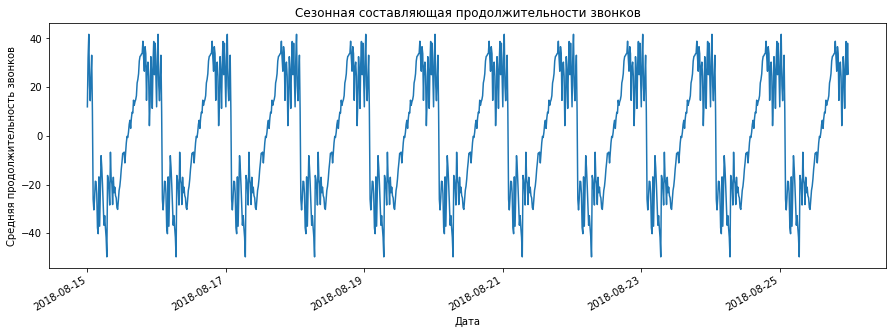

In [31]:
my_plot_std(decomposed_aht.seasonal['2018-08-15':'2018-08-25'],
        x_lbl='Дата', y_lbl='Средняя продолжительность звонков', title='Сезонная составляющая продолжительности звонков')

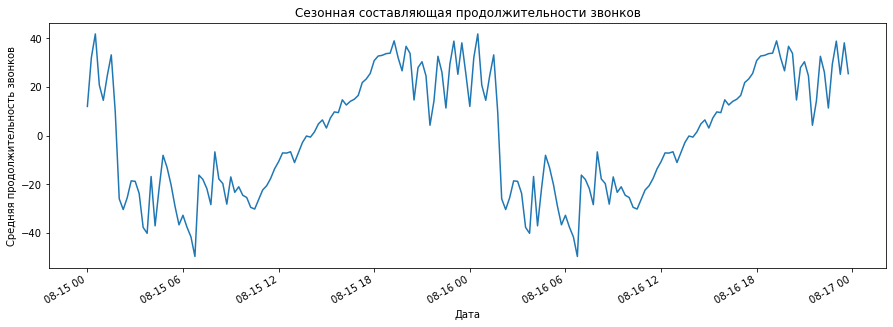

In [32]:
my_plot_std(decomposed_aht.seasonal['2018-08-15':'2018-08-16'],
        x_lbl='Дата', y_lbl='Средняя продолжительность звонков', title='Сезонная составляющая продолжительности звонков')

Продолжительность звонков также наиболее выраженно меняется внутри суток.

Остатки декомпозиции:

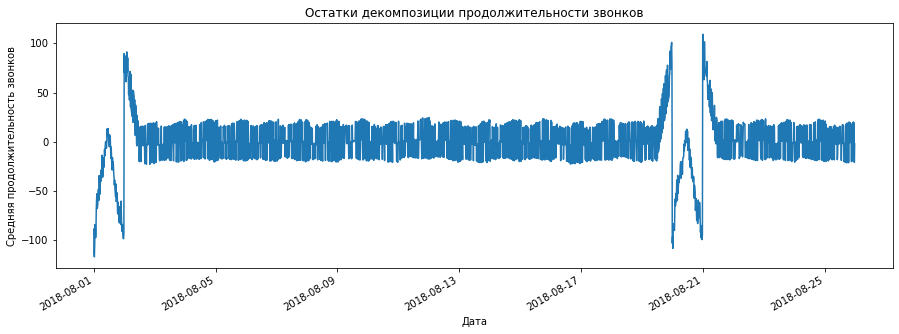

In [33]:
my_plot_std(decomposed_aht.resid['2018-08-01':'2018-08-25'],
    x_lbl='Дата', y_lbl='Средняя продолжительность звонков', title='Остатки декомпозиции продолжительности звонков')

- Данные 'events.csv'

In [34]:
events = pd.read_csv('events.csv', index_col = [0], parse_dates = [0])

In [35]:
events

,events,type,reach
date,,,
2017-10-30,рассылка,рассылка,1469721.0
2017-11-06,день народного единства и согласия,пр2,NaN
2017-11-10,реклама,реклама,250000.0
2017-11-16,рассылка,рассылка,928000.0
2017-11-24,реклама,реклама,200000.0
...,...,...,...
2021-02-22,день российской армии,пр2,NaN
2021-02-23,день российской армии,пр2,NaN
NaT,NaN,NaN,NaN


In [36]:
events.index.is_monotonic

False

In [37]:
events = events.sort_index()

Удалим записи, где отсутствует дата:

In [38]:
events = events[~events.index.isnull()]

In [39]:
events.index.is_monotonic

True

Посмотрим общую информацию о данных events:

In [40]:
events.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 137 entries, 2017-10-30 to 2021-02-23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   events  137 non-null    object 
 1   type    137 non-null    object 
 2   reach   66 non-null     float64
dtypes: float64(1), object(2)
memory usage: 4.3+ KB


In [41]:
events.describe()

,reach
count,6.600000e+01
mean,1.503133e+06
std,5.923586e+05
min,2.000000e+05
25%,1.067940e+06
50%,1.562067e+06
75%,1.849783e+06
max,3.146000e+06


In [42]:
events['events'].unique()

array(['рассылка', 'день народного единства и согласия', 'реклама',
       'новый год и рождество', 'день российской армии',
       'международный женский день', 'перенесенный рабочий день',
       'майские праздники', 'день россии', 'авария',
       'майские праздники-к19'], dtype=object)

In [43]:
events['type'].unique()

array(['рассылка', 'пр2', 'реклама', 'пр1', 'рд', 'авария', 'мп-к19'],
      dtype=object)

Посмотрим на пропуски данных в охвате reach:

In [44]:
events[events['reach'].isnull()].sample(10)

,events,type,reach
date,,,
2020-05-10,майские праздники-к19,мп-к19,NaN
2019-05-09,майские праздники,пр1,NaN
2021-02-20,перенесенный рабочий день,рд,NaN
2018-01-05,новый год и рождество,пр1,NaN
2018-04-28,перенесенный рабочий день,рд,NaN
2018-06-12,день россии,пр2,NaN
2020-05-11,майские праздники-к19,мп-к19,NaN
2018-06-09,перенесенный рабочий день,рд,NaN
2021-01-05,новый год и рождество,пр1,NaN


Посмотрим, какое среднее значение охвата бывает в зависимости от типа события:

In [45]:
events.groupby('type').agg({'reach':'mean'})

,reach
type,
авария,NaN
мп-к19,NaN
пр1,NaN
пр2,NaN
рассылка,1.468566e+06
рд,NaN
реклама,1.537700e+06


Значение охвата имеется только для рассылки и рекламы.

Заменим пропуски данных в рассылке на 0:

In [46]:
events = events.fillna(0)

Нормализуем данные охвата:

In [47]:
scaler = StandardScaler()

In [48]:
events['reach'] = scaler.fit_transform(events['reach'].values.reshape(-1,1))

Объединим данные обоих файлов. Для этого добавим в файл 'data' столбец с датой:

In [49]:
data['date'] = pd.to_datetime(data.index.date)

In [50]:
data_events = data.join(events[:'2020-08-30'], how='left', on='date')

Заменим пропуски на 0:

In [51]:
data_events = data_events.fillna(0)

Добавим дополнительный столбец, который будет показывать, было ли событие любого типа в этот день:

In [52]:
data_events['event_flag'] = (data_events['events'] != 0).values

Уберем лишний столбец 'date':

In [53]:
data_events = data_events.drop('date', axis=1)

Построим совместный график звонков с флагом наличия события:

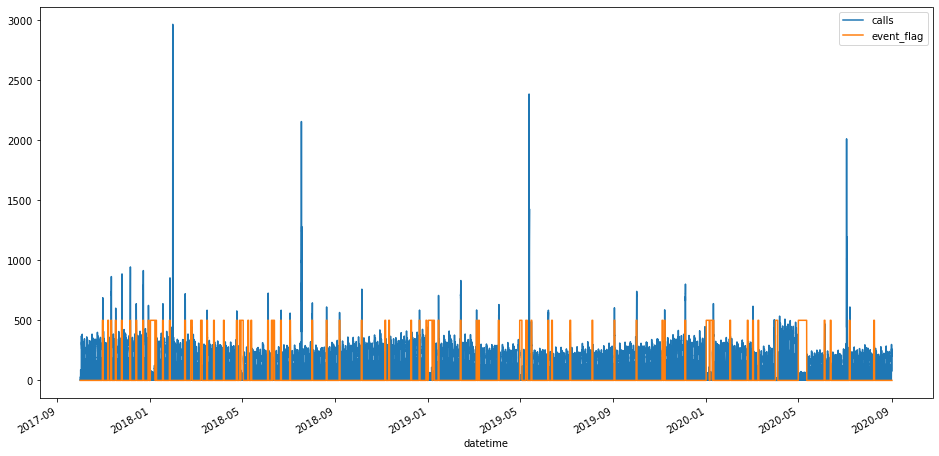

In [54]:
test = data_events.copy()
test['event_flag'] = test['event_flag'].astype('int')*500
test[:][['calls', 'event_flag']].plot(figsize=(16,8))
plt.show()

Самые высокие значения кол.-ва звонков часто не совпадают с имеющимися событиями. Заменим такие значения (>1000) на среднее кол.-во звонков:

In [55]:
test.loc[test['calls']>1000, 'calls'] = test['calls'].median()

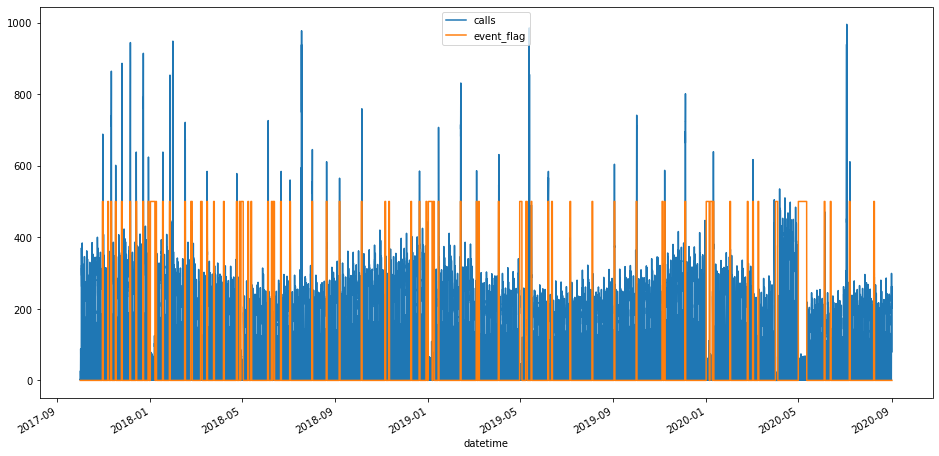

In [56]:
test[:][['calls', 'event_flag']].plot(figsize=(16,8))
plt.show()

Заменим высокие значения звонков на основном датасете:

In [57]:
data_events.loc[data_events['calls'] > 1000, 'calls'] = data_events['calls'].median()

Значения времени разговора менее 200 попробуем заменить на медиану:

In [58]:
data_events.loc[(data_events['aht'] < 200) & (data_events['aht'] >= 0), 'aht'] = data_events['aht'].median()

### 3.2 Создание модели

Кодируем категориальные признаки с помощью OHE:

In [59]:
data_events_ohe = pd.get_dummies(data_events, drop_first=True)

In [60]:
data_events_ohe.head()

,calls,aht,reach,event_flag,events_авария,events_день народного единства и согласия,events_день россии,events_день российской армии,events_майские праздники,events_майские праздники-к19,events_международный женский день,events_новый год и рождество,events_перенесенный рабочий день,events_рассылка,events_реклама,type_авария,type_мп-к19,type_пр1,type_пр2,type_рассылка,type_рд,type_реклама
datetime,,,,,,,,,,,,,,,,,,,,,,
2017-10-01 00:00:00,25.0,325.0,0.0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-10-01 00:14:59,16.0,367.0,0.0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-10-01 00:30:00,20.0,335.0,0.0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-10-01 00:45:00,22.0,315.0,0.0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-10-01 00:59:59,12.0,309.0,0.0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Создадим функцию для добавления признаков в таблицу data

In [61]:
def make_features(data):
    """
    Добавление признаков в dataframe
    """
    data_features = data.copy()
    data_features['year'] = data.index.year - 2017
    data_features['month'] = data.index.month
    data_features['day'] = data.index.day
    data_features['dayofweek'] = data.index.dayofweek
    data_features['hour'] = data.index.hour
    data_features['minutes'] = data.index.minute
    #data_features['quarter'] = data.index.quarter
    #data_features['week'] = data.index.week
    
    return data_features

In [62]:
data_event_feat = make_features(data_events_ohe)

Добавим сезон года в признаки:

In [63]:
 def season(data):
        if data['month'] in [12,1,2]:
            return 1
        if data['month'] in [3,4,5]:
            return 2
        if data['month'] in [6,7,8]:
            return 3
        if data['month'] in [9,10,11]:
            return 4

In [64]:
data_event_feat['season'] = data_event_feat.apply(season, axis=1)

Добавим в признаки 15-мин. доли каждого часа:

In [65]:
 def minutes(data):
        if data['minutes'] in [0, 59]:
            return 1
        if data['minutes'] in [14, 15]:
            return 2
        if data['minutes'] in [29, 30]:
            return 3
        if data['minutes'] in [44, 45]:
            return 4

In [66]:
data_event_feat['minutes'] = data_event_feat.apply(minutes, axis=1)

In [67]:
# Признак выходного дня:
# def weekend(data):
#     if data['dayofweek'] in [5,6]:
#         return 1
#     else: return 0

# data_event_feat['weekend'] = data_event_feat.apply(weekend, axis=1)

Посмотрим на тепловую карту корреляции признаков:

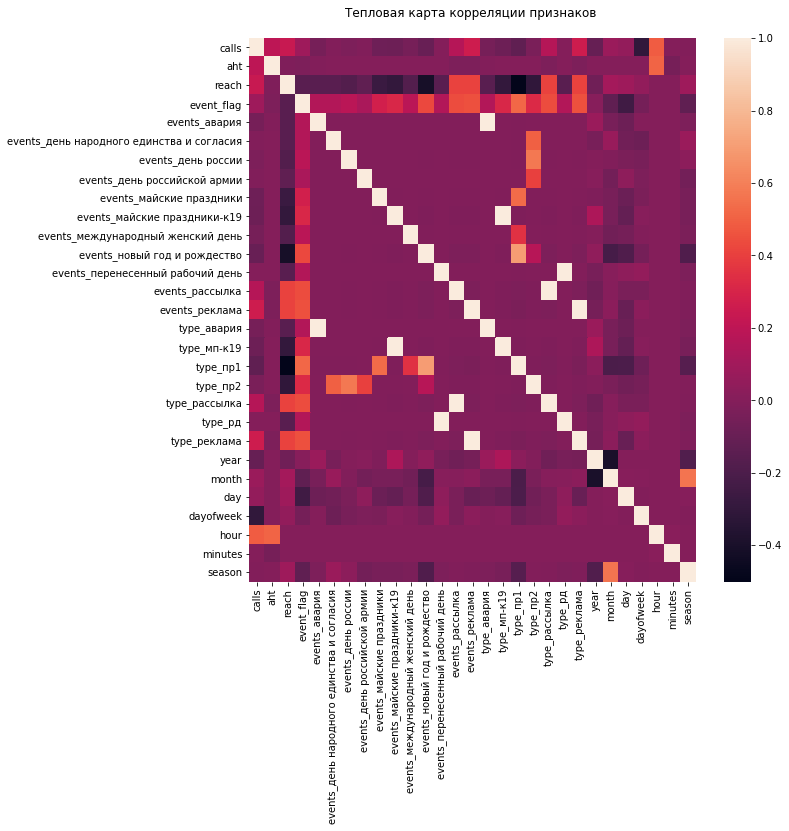

In [68]:
plt.figure(figsize = (10, 10))
sns.heatmap(data_event_feat.corr(), xticklabels=True, yticklabels=True)
plt.title('Тепловая карта корреляции признаков \n')
plt.show()

Уберем некоторые признаки, имеющие высокую корреляцию с другими признаками:

In [69]:
data_event_feat = data_event_feat.drop(['type_авария', 'type_мп-к19', 'type_рассылка', 'type_рд', 'type_реклама'], axis=1)

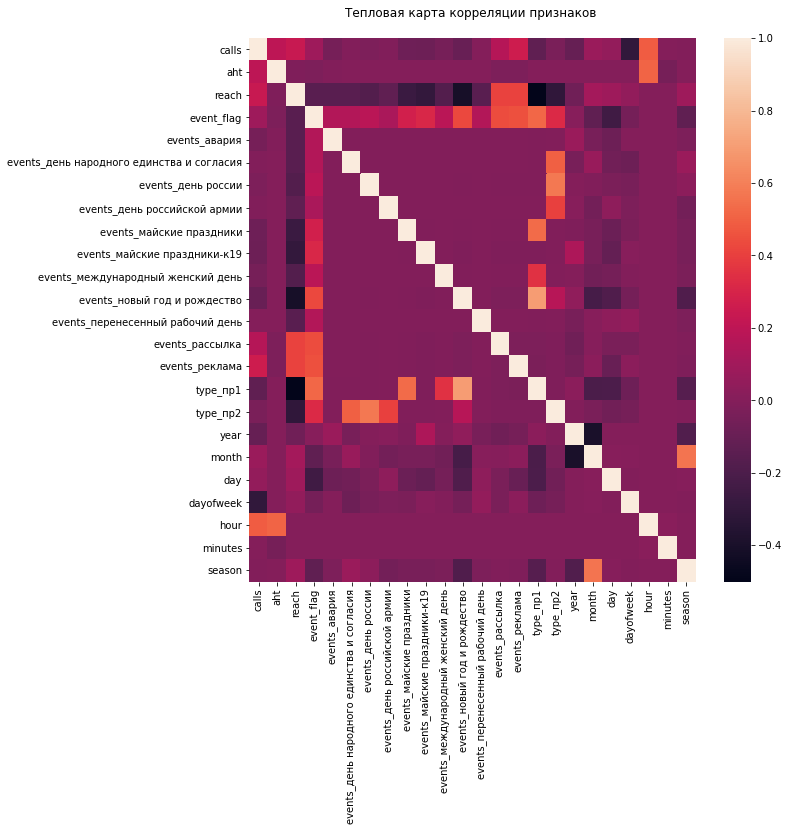

In [70]:
plt.figure(figsize = (10, 10))
sns.heatmap(data_event_feat.corr(), xticklabels=True, yticklabels=True)
plt.title('Тепловая карта корреляции признаков \n')
plt.show()

Создадим функцию для разделения данных на обучающую, валидационную выборки:

In [71]:
def split(data):
    """
    Разделение dataframe на обучающую и валидационную выборки в соотношении 80/20.
    """
    data_features = data.copy()
    train, valid = train_test_split(data_features, shuffle=False, test_size=0.2, random_state=0)
    train = train.dropna()
    
    features_train = train.drop(['calls', 'aht'], axis=1)
    features_valid = valid.drop(['calls', 'aht'], axis=1)

    target_train = train[['calls', 'aht']]
    target_valid = valid[['calls', 'aht']]
    
    return features_train, features_valid, target_train, target_valid

In [72]:
features_train, features_valid, target_train, target_valid = split(data_event_feat)

Создадим модель линейной регрессии:

In [73]:
model_linear =  LinearRegression()
model_linear.fit(features_train, target_train)
predictions_valid_linear = model_linear.predict(features_valid)
rmse_linear = mean_squared_error(target_valid, predictions_valid_linear)**0.5
rmse_linear

152548221916.11816

Метрика RMSE получается неадекватной. Посмотрим на коэффициенты модели:

In [74]:
model =  make_pipeline(StandardScaler(), LinearRegression())
model.fit(features_train, target_train)

coefs = pd.DataFrame(
   model[1].coef_,
   columns=features_train.columns, index=[['Calls', 'aht']]
)

In [75]:
coefs

,reach,event_flag,events_авария,events_день народного единства и согласия,events_день россии,events_день российской армии,events_майские праздники,events_майские праздники-к19,events_международный женский день,events_новый год и рождество,events_перенесенный рабочий день,events_рассылка,events_реклама,type_пр1,type_пр2,year,month,day,dayofweek,hour,minutes,season
Calls,-21.022481,6.820905e+09,3.560732e+08,2.298153e+11,2.298153e+11,1.328400e+11,3.966441e+11,-4.118829e+08,2.298153e+11,6.015601e+11,-1.362490e+09,-3.566427e+09,-3.396424e+09,-7.193410e+11,-4.203290e+11,-4.542452,7.462818,5.078284,-38.287194,59.257295,-0.990571,-6.768916
aht,-0.089824,-7.854218e+10,1.692799e+08,1.207257e+11,1.207257e+11,6.978296e+10,2.083635e+11,-1.966043e+08,1.207257e+11,3.160091e+11,1.568896e+10,4.106712e+10,3.910955e+10,-3.268359e+11,-1.909784e+11,-0.023152,0.051470,-0.049733,0.028001,14.533872,-1.451244,-0.033666


Уберем коэффициенты с высокими значениями и построим диаграмму:

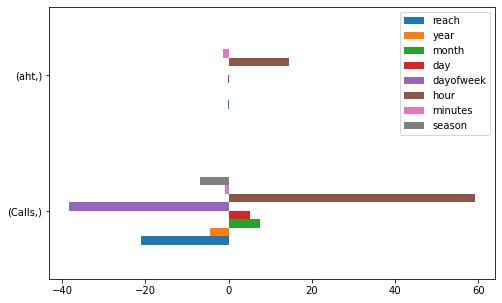

In [76]:
coefs.iloc[:,[0,15,16,17,18,19,20,21]].plot(kind='barh', figsize=(8,5))
plt.show()

Наиболее высокую значимость имеют следующие признаки: hour, dayofweek, reach, season, day, month.

Удалим признаки с высокими коэффициентами и построим линейную регрессию заново:

In [77]:
data_event_feat_linear = data_event_feat.iloc[:,[0,1,2,17,18,19,20,21,22,23]]

In [78]:
features_train_l, features_valid_l, target_train_l, target_valid_l = split(data_event_feat_linear)

In [79]:
model_linear =  LinearRegression()
model_linear.fit(features_train_l, target_train_l)
predictions_valid_linear = model_linear.predict(features_valid_l)
rmse_linear = mean_squared_error(target_valid_l, predictions_valid_linear)**0.5
rmse_linear

62.018830935984255

Построим модель RandomForest и посмотрим на относительную важность признаков:

In [80]:
%%time

forest_results = []

for depth in [20]:

    model_forest = RandomForestRegressor(
        max_depth=depth,
        n_estimators=50,
        random_state=0,
        n_jobs=-1
        ) 
    model_forest.fit(features_train, target_train)
    predictions_valid_forest = model_forest.predict(features_valid)

    rmse_valid_forest = mean_squared_error(target_valid, predictions_valid_forest)**0.5
    result = depth, rmse_valid_forest # depth, estimator,
    forest_results.append(result)
            
df_forest = pd.DataFrame(forest_results, columns=['depth', 'rmse_valid'])
print('Наименьшее значение RMSE получено при следующих параметрах:')
df_forest.loc[df_forest['rmse_valid'].idxmin()]

Наименьшее значение RMSE получено при следующих параметрах:
Wall time: 2.5 s


depth         20.000000
rmse_valid    37.326824
Name: 0, dtype: float64

RMSE RandomForest ниже, чем RMSE линейной регрессии. Для дальнейшей работы будем использовать модель RandomForest.

In [81]:
feature_importances = pd.DataFrame(
    model_forest.feature_importances_*100,
    index=features_train.columns,
    columns=['random_forest'])

In [82]:
feature_importances.sort_values(by='random_forest', ascending=False)

,random_forest
hour,54.488572
dayofweek,18.176740
events_реклама,11.351840
type_пр1,4.461033
events_рассылка,3.415991
month,2.551843
day,1.639050
reach,1.268246
minutes,0.992568
season,0.691830


Удалим признаки с важностью ниже определенного предела (0.5) и построим новую модель:

In [83]:
importance_cutoff = 0.5

In [84]:
columns = np.append(np.array(
    feature_importances[feature_importances['random_forest'] > importance_cutoff].index), ['calls', 'aht'])

In [85]:
data_event_feat = data_event_feat.loc[:,columns]

In [86]:
%%time

features_train, features_valid, target_train, target_valid = split(data_event_feat)

forest_results = []

for depth in [20]:

    model_forest = RandomForestRegressor(
        max_depth=depth,
        n_estimators=50,
        random_state=0,
        n_jobs=-1) 
    model_forest.fit(features_train, target_train)
    predictions_valid_forest = model_forest.predict(features_valid)

    rmse_valid_forest = mean_squared_error(target_valid, predictions_valid_forest)**0.5
    result = depth, rmse_valid_forest # depth, estimator,
    forest_results.append(result)
            
df_forest = pd.DataFrame(forest_results, columns=['depth', 'rmse_valid'])
print('Наименьшее значение RMSE получено при следующих параметрах:')
df_forest.loc[df_forest['rmse_valid'].idxmin()]

Наименьшее значение RMSE получено при следующих параметрах:
Wall time: 2.2 s


depth         20.000000
rmse_valid    36.734807
Name: 0, dtype: float64

Реализуем поиск гиперпараметров для RandomForest через GridSearch, используя TimeSeriesSplit=4. Для этого создадим таблицы с итоговыми признаками, создадим scorer на основе метрики WAPE и переберём параметры через GridSearch:

In [87]:
features = data_event_feat.drop(['calls', 'aht'], axis=1)
target = data_event_feat[['calls', 'aht']]

In [88]:
# def rmse_calc(target, predictions):
#    rmse = (mean_squared_error(predictions, target))**0.5
#    return rmse

In [89]:
def WAPE_calc(target, predictions):
    """
    Расчет метрики WAPE на основе предлагаемой по условиям задачи формулы
    """
    day_calls = target.join(pd.DataFrame(predictions, index=target.index, columns=['calls_t', 'aht_t']),
                  how='left').drop(['aht', 'aht_t'], axis=1)
    day_calls  = day_calls.groupby(day_calls.index.date).agg({'sum'})
    day_calls.columns = ['calls', 'calls_t']
    WAPE_vol_day = (abs(day_calls['calls']-day_calls['calls_t'])).sum()/day_calls['calls_t'].sum()*100
    
    WAPE = ((abs(predictions-target).sum()/target.sum()*100).sum() + WAPE_vol_day)/3
    return WAPE

In [90]:
my_scorer = make_scorer(WAPE_calc, greater_is_better=False)

In [91]:
tscv = TimeSeriesSplit(n_splits=4)

In [92]:
#установлены лучшие найденные гиперпараметры
random_forest_param = {'n_estimators': [100],        
                       'max_depth': [20],
                       'max_features': [3],
                       'n_jobs': [-1],
                       'min_samples_leaf': [2]
                      }

In [93]:
gsearch = GridSearchCV(
    estimator=model_forest, 
    cv=tscv, 
    param_grid=random_forest_param, 
    scoring=my_scorer)

In [94]:
%%time
gsearch.fit(features, target)

Wall time: 8.9 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
             estimator=RandomForestRegressor(max_depth=20, n_estimators=50,
                                             n_jobs=-1, random_state=0),
             param_grid={'max_depth': [20], 'max_features': [3],
                         'min_samples_leaf': [2], 'n_estimators': [100],
                         'n_jobs': [-1]},
             scoring=make_scorer(WAPE_calc, greater_is_better=False))

In [95]:
abs(gsearch.best_score_)

10.135059698546037

In [96]:
gsearch.best_params_

{'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 2,
 'n_estimators': 100,
 'n_jobs': -1}

### 3.3 Предсказание на тестовых признаках

Подготовим датасет с тестовыми признаками.

Генерируем последовательность дат с 1.09.2020 по 28.02.2021:

In [97]:
start = datetime(2018,1,1,0,0,0)
end = datetime(2019,1,2,0,0,0)
delta = dt.timedelta(days=366)

In [98]:
my_features = pd.DataFrame(features['2019-9-1':'2020-2-28'].index + delta,
                          index=features['2019-9-1':'2020-2-28'].index + delta )

In [99]:
my_features['date'] = pd.to_datetime(my_features.index.date)

In [100]:
my_features = my_features.drop('datetime', axis=1)

In [101]:
my_features = my_features.join(events['2020-09-01':'2021-02-28'], how='left', on='date')

In [102]:
my_features  = my_features.fillna(0)

In [103]:
my_features = my_features.drop('date', axis=1)

Кодируем признаки с помощью OHE:

In [104]:
my_features_ohe = pd.get_dummies(my_features, drop_first=True)

Добавляем все признаки:

In [105]:
my_features_feat = make_features(my_features_ohe)

In [106]:
my_features_feat['season'] = my_features_feat.apply(season, axis=1)

In [107]:
my_features_feat['minutes'] = my_features_feat.apply(minutes, axis=1)

Оставляем только нужные признаки:

In [108]:
columns = features.columns

In [109]:
my_features_feat = my_features_feat.loc[:,columns]

Создаем модель случайного леса с найденными ранее параметрами:

In [110]:
model_forest = RandomForestRegressor(
    max_depth = 20,
    n_estimators = 100,
    random_state = 0,
    min_samples_leaf = 2,
    max_features = 3,
    n_jobs=-1
    ) 
model_forest.fit(features, target)
predictions = model_forest.predict(my_features_feat)

In [111]:
result = pd.DataFrame(predictions, index=my_features_feat.index, columns=['calls', 'aht'])

Введём поправку на работу ассистента, который снижает загрузку операторов:

In [112]:
result.loc[(result.index.time >= dt.time(15, 0, 0)) 
    & (result.index.time <= dt.time(19, 59, 59))
    & (result.index.date >= dt.date(2020,12,1)), 'calls'] \
        = result.loc[(result.index.time >= dt.time(15, 0, 0)) 
        & (result.index.time <= dt.time(19, 59, 59))
        & (result.index.date >= dt.date(2020,12,1)), 'calls'] * 0.89

Округляем результат до целых и приводим к типу int:

In [113]:
result = round(result[['calls', 'aht']],0)

In [114]:
result = result.astype('int')

In [115]:
result.head()

,calls,aht
datetime,,
2020-09-01 00:00:00,41,325
2020-09-01 00:14:59,40,347
2020-09-01 00:30:00,36,360
2020-09-01 00:45:00,30,337
2020-09-01 00:59:59,41,325


In [116]:
result.tail()

,calls,aht
datetime,,
2021-02-28 22:44:59,44,337
2021-02-28 23:00:00,41,360
2021-02-28 23:15:00,35,337
2021-02-28 23:29:59,31,346
2021-02-28 23:45:00,28,344


In [117]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17376 entries, 2020-09-01 00:00:00 to 2021-02-28 23:45:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   calls   17376 non-null  int32
 1   aht     17376 non-null  int32
dtypes: int32(2)
memory usage: 271.5 KB


## 4. Результат
Результат выполненного задания, пожалуйста, сохрани в переменную `results`, чтобы итоговая таблица была в формате:

 datetime | calls | aht
 :-- | :--: | :--:
 2020-09-01 00:00 | 55 | 325
 2020-09-01 00:15 | 74 | 330
 2020-09-01 00:30 | 100 | 300
 ... | ... | ...
 2021-02-28 23:15 | 122 | 279
 2021-02-28 23:30 | 79 | 250
 2021-02-28 23:45 | 25 | 322

In [118]:
# таблица с твоими результатами
results = result

In [119]:
results

,calls,aht
datetime,,
2020-09-01 00:00:00,41,325
2020-09-01 00:14:59,40,347
2020-09-01 00:30:00,36,360
2020-09-01 00:45:00,30,337
2020-09-01 00:59:59,41,325
...,...,...
2021-02-28 22:44:59,44,337
2021-02-28 23:00:00,41,360
2021-02-28 23:15:00,35,337


In [120]:
# просьба не удалять, для организатора
# results.to_csv('result_' + participant_name)

Этот файл ipynb прикрепи к форме https://forms.yandex.ru/u/624da5bb5c8e0e4f2ce6bdac/